# Import et téléchargement du matériau

In [1]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import pymatgen.electronic_structure.plotter as esp
from pymatgen.electronic_structure.core import Spin
import sympy as sp
import numpy as np

with MPRester("FRwPcLRDMNnTniHs") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961646")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-961646")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-961646")

# Bande interdite

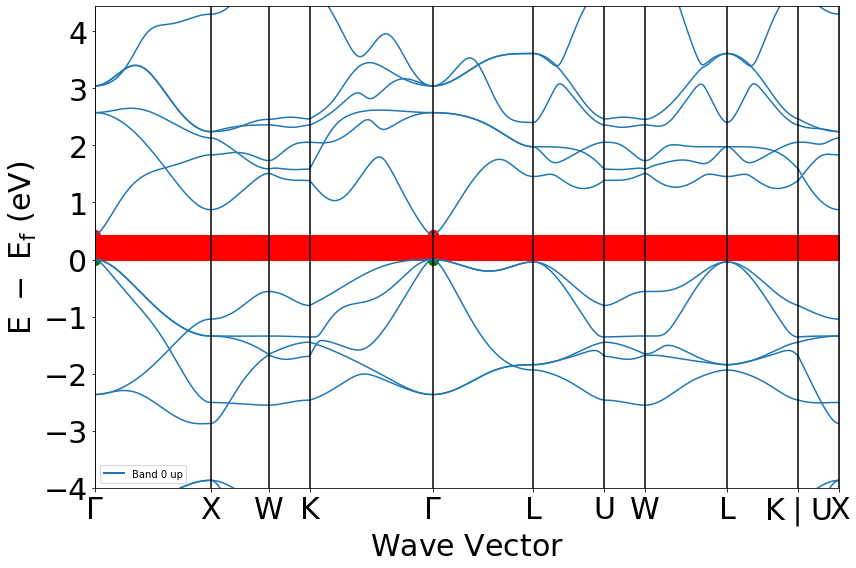

In [2]:
bandeselec = esp.BSPlotter(bandstructure)
plot = bandeselec.get_plot(vbm_cbm_marker=True)
data = bandeselec.bs_plot_data()
maxval = data['vbm'][0][1]
mincon = data['cbm'][0][1]
x = bandeselec.get_ticks()["distance"]
plot.fill_between(np.linspace(x[0],x[-1]),maxval,mincon,color='red')
plot.show()

On remarque sur la figure ci-dessus représentant la structure de bande électronique que la transition est directe en Gamma (Le minimum de la bande de conduction et le maximum de la bande de valence se trouvent en Gamma). L'énergie de la bande interdite est de 0.4377eV

# Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

Pour calculer la dispertion, il faut calculer les pentes des bandes désirées (ici, dernière (première) bande de valence (conduction)).

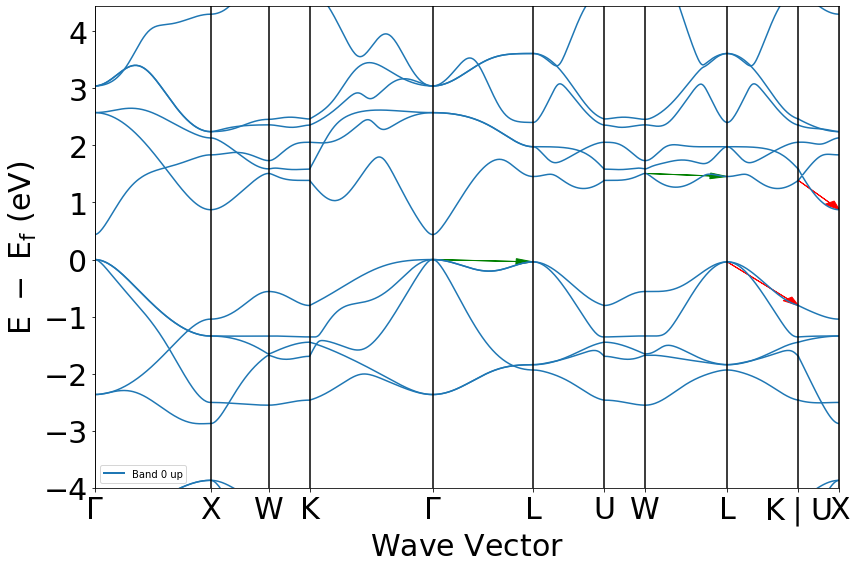

In [31]:
# Trouver les indices des bandes de valence et de conduction
vb_idxx = bs.get_vbm()["band_index"][Spin.up]
cb_idxx = bs.get_cbm()["band_index"][Spin.up]
vb_idx = max(vb_idxx)
cb_idx = min(cb_idxx)

# générer un tableau (uniquedist) en éliminant les doublons du tableau initial(dist)
dist = data.get('ticks').get('distance')
uniquedist = [0.0]

for index, element in enumerate(dist):
    # Si l'indice est impair, ajouter l'élément au tableau des indices impairs
    if index % 2 != 0:
        uniquedist.append(element)
uniquedist.append(dist[-1])

#calcul de la pente

longueur = len(uniquedist)

ddist=[]
dyval=[]
dycond=[]
penteval=[]
pentecond=[]
for i in range(longueur-1):
    ddist.append(uniquedist[i+1] - uniquedist[i])
    dyval.append(data["energy"]["1"][i][vb_idx][-1] - data["energy"]["1"][i][vb_idx][0])
    dycond.append(data["energy"]["1"][i][cb_idx][-1] - data["energy"]["1"][i][cb_idx][0])
    penteval.append(abs(dyval[i]/ddist[i]))
    pentecond.append(abs(dycond[i]/ddist[i]))

#pente maximum et minimum
maxv=max(penteval)
maxv_idx=penteval.index(maxv)
minv=min(penteval)
minv_idx=penteval.index(minv)
maxc=max(pentecond)
maxc_idx=pentecond.index(maxc)
minc=min(pentecond)
minc_idx=pentecond.index(minc)


# Dessiner la figure avec les flèches de dispersion

bandeselec.get_plot()
plt.arrow(uniquedist[maxv_idx], data["energy"]["1"][maxv_idx][vb_idx][0], ddist[maxv_idx], dyval[maxv_idx], head_width=0.1, length_includes_head=True, color="red")
plt.arrow(uniquedist[minv_idx], data["energy"]["1"][minv_idx][vb_idx][0], ddist[minv_idx], dyval[minv_idx], head_width=0.1, length_includes_head=True, color="green")
plt.arrow(uniquedist[maxc_idx], data["energy"]["1"][maxc_idx][cb_idx][0], ddist[maxc_idx], dycond[maxc_idx], head_width=0.1, length_includes_head=True, color="red")
plt.arrow(uniquedist[minc_idx], data["energy"]["1"][minc_idx][cb_idx][0], ddist[minc_idx], dycond[minc_idx], head_width=0.1, length_includes_head=True, color="green")

On remarque que la dernière bande de valence présente un maximum de dispersion dans la direction L-K (pente la plus forte) et un minimum de dispersion dans la direction Γ-L(pente la plus faible).
On remarque que première bande de conduction présente un maximum de dispersion dans la direction U-X (pente la plus forte) et un minimum de dispersion dans la direction W-L(pente la plus faible).
Les flèches rouges représentent les maxima et les vertes, les minima.

# Masse effective

La formule de la masse effective est:
    $$m^{*} = \dfrac{\hbar^{2}}{\dfrac{\partial^{2}E}{\partial k^{2}}}$$
Si on suppose une dispertion parabolique, $E(k)=ak^{2}+bk+c$ et la masse effective devient :
$$m^{*} = \dfrac{\hbar^{2}}{2a}$$

In [ ]:
hbar = (1.054 571 818*10**(-34))
